<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [80]:
!pip install pandas

In [81]:
!pip install matplotlib

In [82]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [83]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-18 21:17:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.3MB/s    in 2.4s    

2025-01-18 21:17:26 (63.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



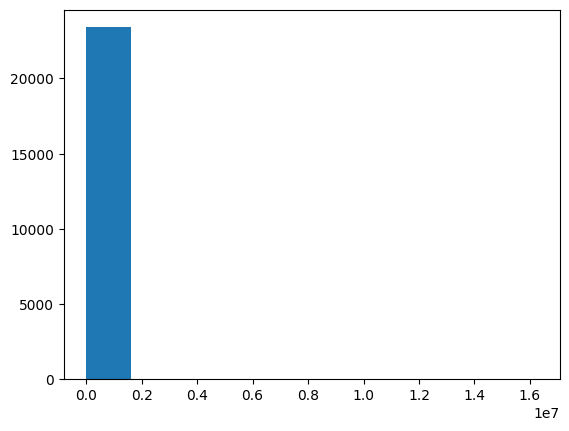

In [84]:
# Histogram of base data just to check it
plt.hist(x=df['ConvertedCompYearly'])
plt.show()

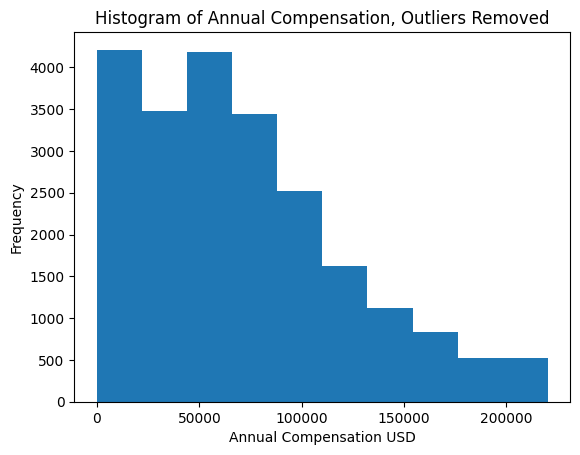

In [85]:
# Remove outliers and redisplay
# Remove negative compensation values
df = df[df['ConvertedCompYearly'] >= 0]

# Recalculate quartiles and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame which excludes outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Histogram of data with outliers removed just to check it
plt.hist(x=df_no_outliers['ConvertedCompYearly'])

plt.ylabel('Frequency')
plt.xlabel('Annual Compensation USD')
plt.title('Histogram of Annual Compensation, Outliers Removed')
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



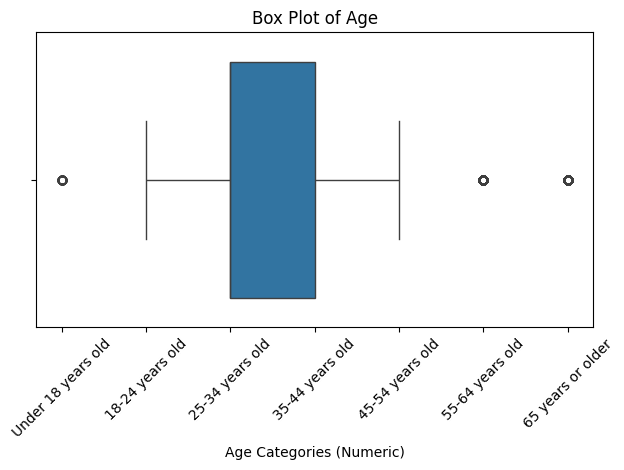

In [86]:
# Build dictionary to map ages into numeric values
age_map = {
            'Under 18 years old': 0,
            '18-24 years old': 1,
            '25-34 years old': 2,
            '35-44 years old': 3,
            '45-54 years old': 4,
            '55-64 years old': 5,
            '65 years or older': 6
            # Omitted the age group 'Prefer not to say': None
}

# Impute a numeric value for age for each record based on the dictionary values
df['Age_Num'] = df['Age'].map(age_map)

# Drop any null values
df.dropna(subset=['Age_Num'])

# Do the boxplot
sns.boxplot(x=df['Age_Num'])

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.title('Box Plot of Age')

# Customize x-axis labels
plt.xticks(range(7), age_map.keys(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



/tmp/ipykernel_1321/3631185069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_Num'] = df_no_outliers['Age'].map(age_map)


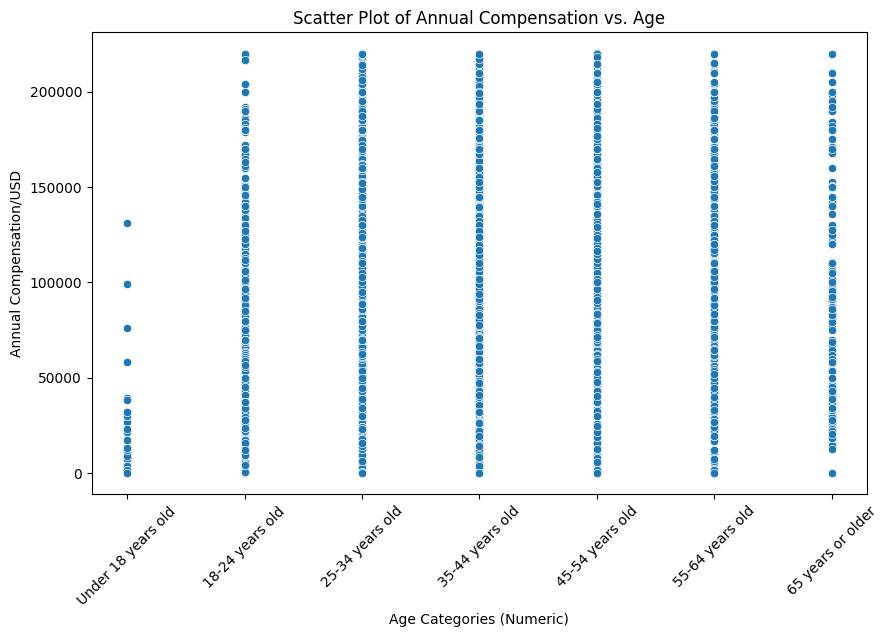

In [87]:
# Return to the df_no_outliers datframe created in 1.0
# Impute a numeric value for age for each record based on
# the dictionary values in 1.2
df_no_outliers['Age_Num'] = df_no_outliers['Age'].map(age_map)

# Drop any null values
df_no_outliers.dropna(subset=['Age_Num'])

# use the scatterplot function to build the bubble map
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x="Age_Num", y="ConvertedCompYearly", sizes=(20,20))

# Customize x-axis labels
plt.xticks(range(7), age_map.keys(), rotation=45)

# Add labels and title
plt.xlabel('Age Categories (Numeric)')
plt.ylabel('Annual Compensation/USD')
plt.title('Scatter Plot of Annual Compensation vs. Age')

# show the graph
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


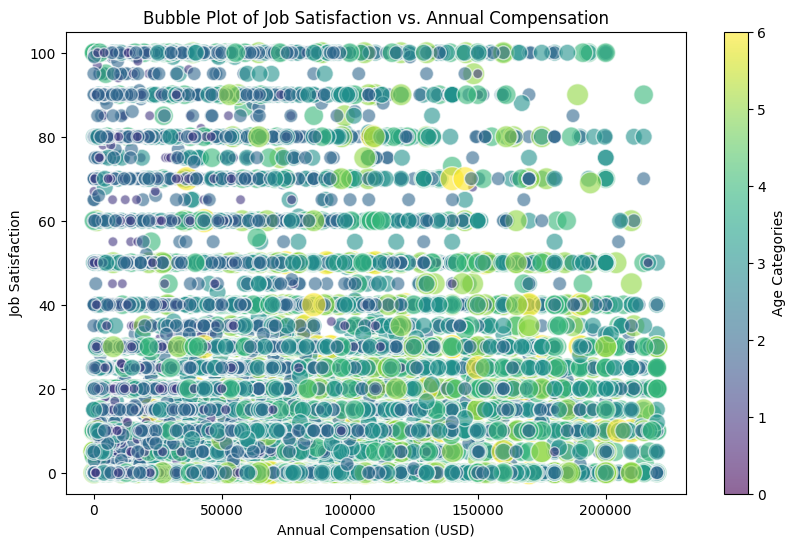

In [88]:
# Drop any null values
df_no_outliers.dropna(subset=['JobSatPoints_6'])

# use the scatterplot function to build the bubble map
plt.figure(figsize=(10, 6))
scatter_bubble = plt.scatter(df_no_outliers['ConvertedCompYearly'], df_no_outliers['JobSatPoints_6'], 
            s=df_no_outliers['Age_Num'] * 50, c=df_no_outliers['Age_Num'], cmap='viridis', alpha=0.6, edgecolors='w')

# Add labels and title
plt.xlabel('Annual Compensation (USD)')
plt.ylabel('Job Satisfaction')
plt.title('Bubble Plot of Job Satisfaction vs. Annual Compensation')
cbar = plt.colorbar(scatter_bubble)
cbar.set_label('Age Categories')
# show the graph
plt.show()



### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



Text(0.5, 1.0, 'Bar Chart of Counts vs. MainBranch Categories')

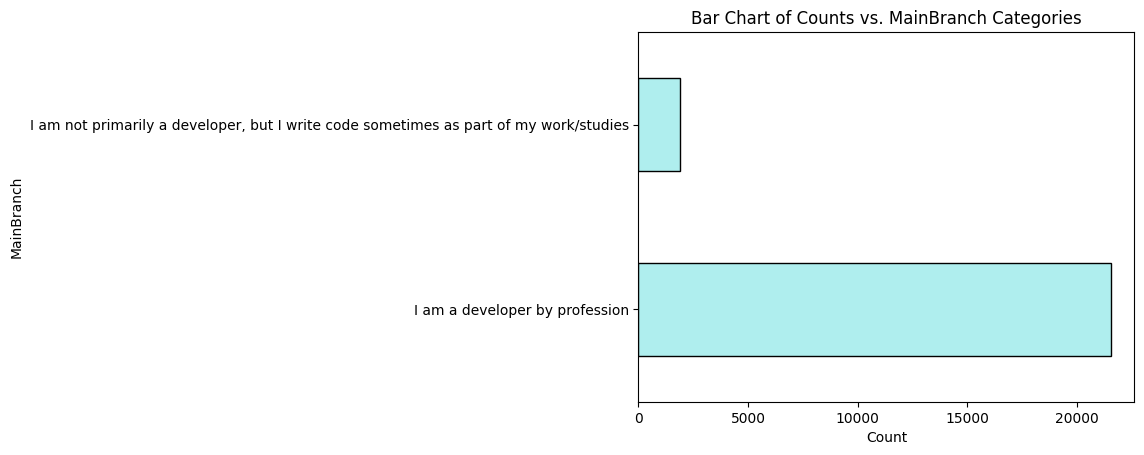

In [89]:
# Count MainBranch
df_mainbranch_counts = df['MainBranch'].value_counts()

# Plot a bar chart
df_mainbranch_counts.plot(kind='barh', color='paleturquoise', edgecolor='black')

plt.xlabel('Count')
plt.title('Bar Chart of Counts vs. MainBranch Categories')


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



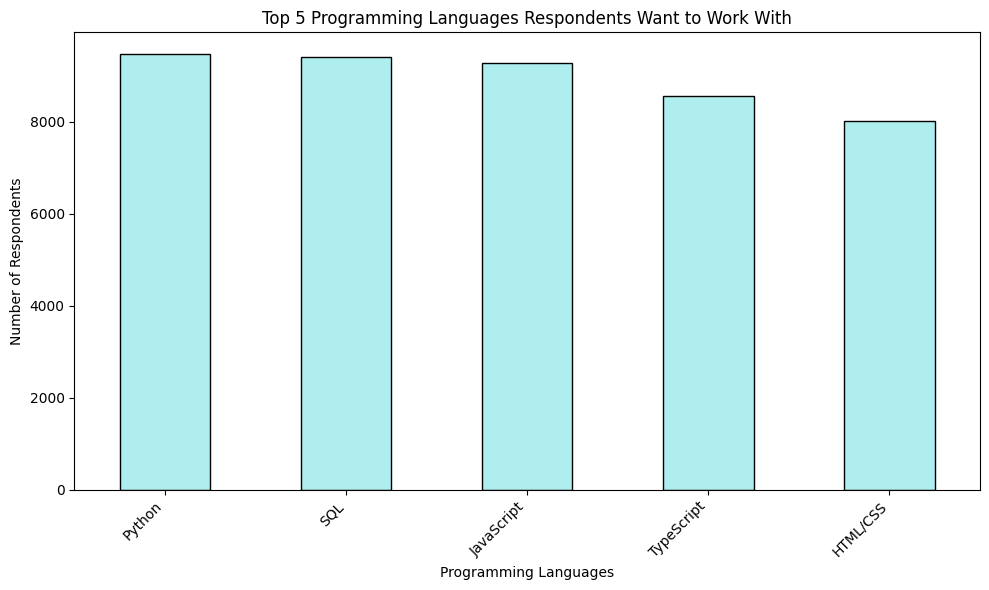

In [90]:
# Split the 'LanguageWantToWorkWith' column and explode it
languages_wanted = df['LanguageWantToWorkWith'].str.split(';').explode()

# Count the occurrences of each language
language_counts = languages_wanted.value_counts()

# Get the top 5 languages
top_5_languages = language_counts.head(5)

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind='bar', color='paleturquoise', edgecolor='black')

# Customize the chart
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


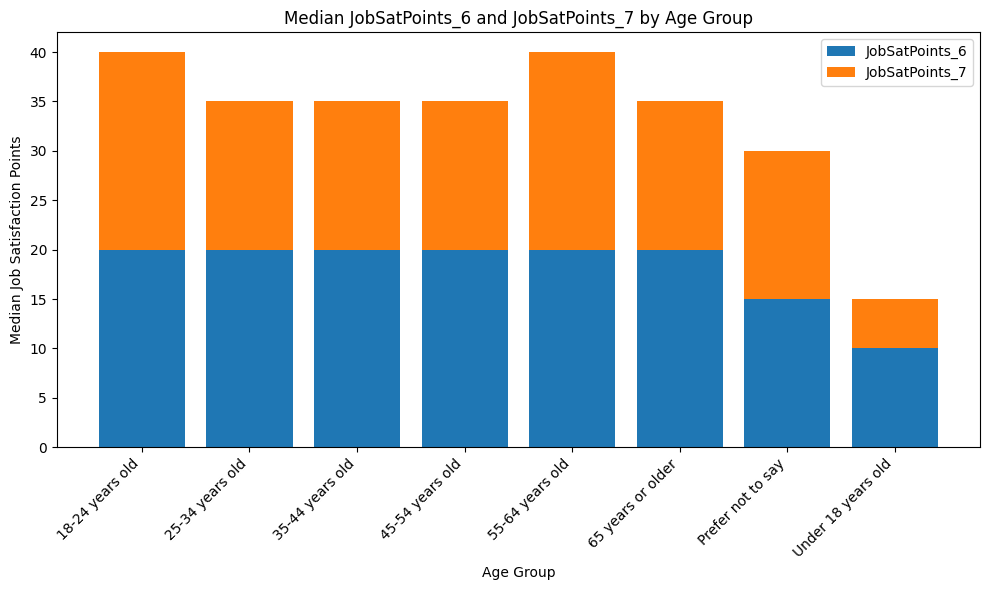

In [91]:
# Group data by age and calculate the median of JobSatPoints_6 and JobSatPoints_7
age_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(age_job_sat['Age'], age_job_sat['JobSatPoints_7'], bottom=age_job_sat['JobSatPoints_6'], label='JobSatPoints_7')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



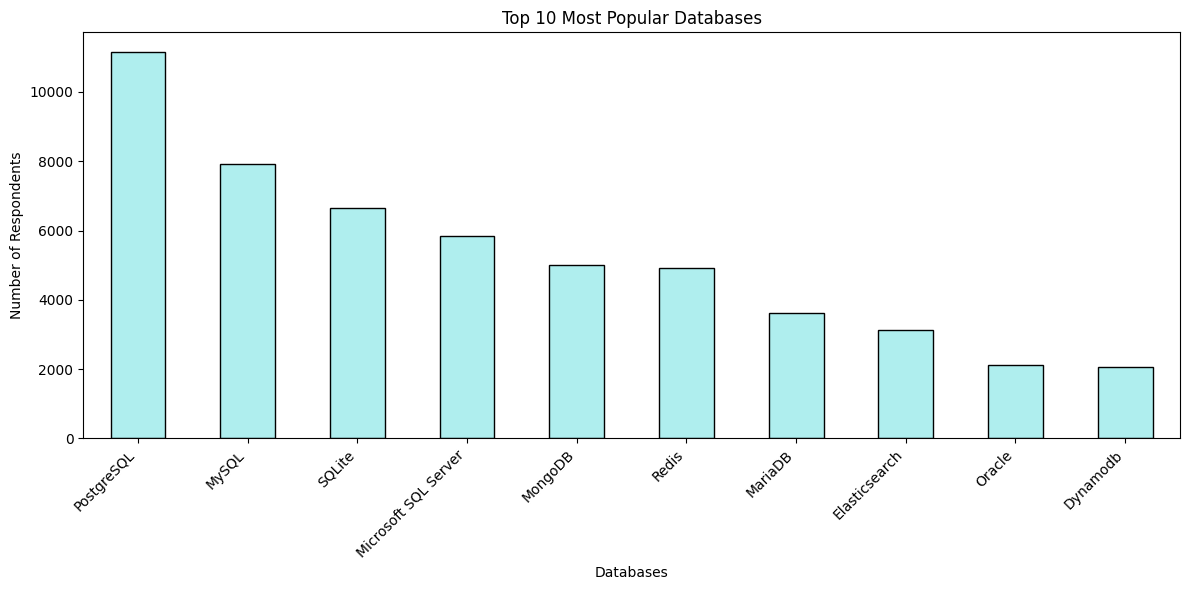

In [92]:
## Write your code here
# Split the 'DatabaseHaveWorkedWith' column and explode it
databases = df['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count the occurrences of each database
database_counts = databases.value_counts()

# Get the top 10 databases
top_10_databases = database_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_10_databases.plot(kind='bar', color='paleturquoise', edgecolor='black')

# Customize the chart
plt.xlabel('Databases')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Most Popular Databases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



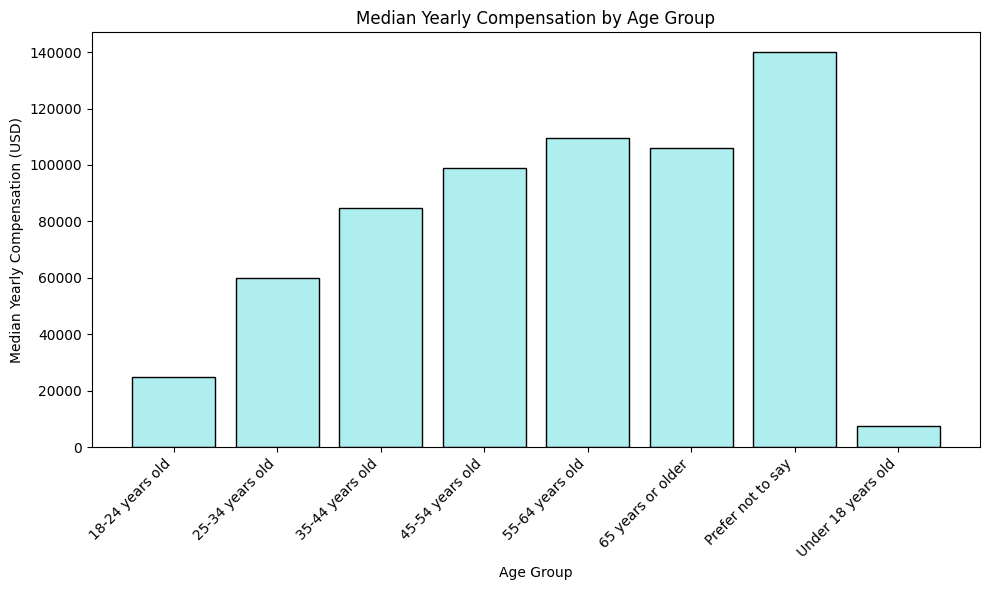

In [93]:
# Group data by age and calculate the median ConvertedCompYearly
age_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_compensation['Age'], age_compensation['ConvertedCompYearly'], color='paleturquoise', edgecolor='black')

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



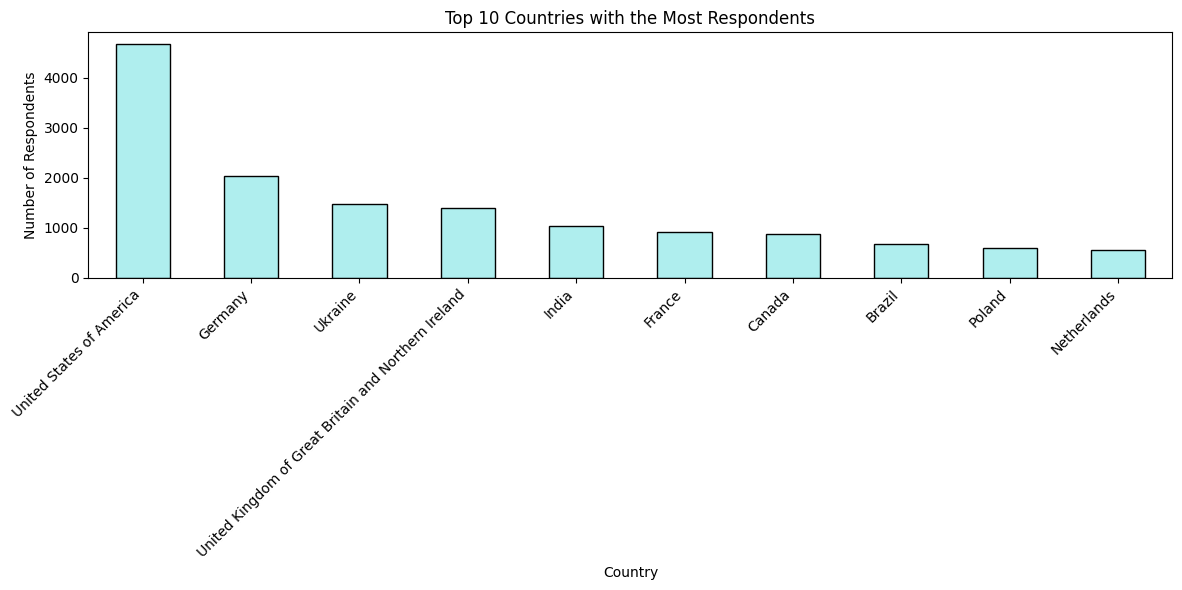

In [94]:
# Calculate the number of respondents for each country
country_counts = df['Country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='paleturquoise', edgecolor='black')

# Customize the chart
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.title('Top 10 Countries with the Most Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
